## 9. Tổng hợp Training Results từ Checkpoints

Phân tích kết quả training từ các checkpoint epoch 10 của tất cả các model variants

In [1]:
import torch
import pandas as pd
from pathlib import Path

# Định nghĩa checkpoint folder
CHECKPOINTS_DIR = Path('checkpoints_full')

# Danh sách các model folders
model_folders = [
    'gat-ce',
    'gat-focal-1e-4', 
    'gat-focal-5e-5',
    'gcn-ce',
    'gcn-focal',
    'nognn-ce',
    'nognn-focal',
    'baseline2-ce',
    'baseline2-focal'
]

# Thu thập thông tin từ checkpoint epoch 10
checkpoint_data = []

for model_folder in model_folders:
    checkpoint_path = CHECKPOINTS_DIR / model_folder / 'checkpoint_epoch_10.pth'
    
    if checkpoint_path.exists():
        try:
            # Load checkpoint
            checkpoint = torch.load(checkpoint_path, map_location='cpu')
            
            # Phân tích tên model
            model_name_parts = model_folder.split('-')
            if 'baseline' in model_folder:
                model_type = 'Baseline'
                loss_type = model_name_parts[-1].upper()
            else:
                model_type = model_name_parts[0].upper()
                if len(model_name_parts) == 3:
                    loss_type = f"{model_name_parts[1].upper()}-{model_name_parts[2]}"
                else:
                    loss_type = model_name_parts[1].upper()
            
            # Tên hiển thị
            if model_type == 'NOGNN':
                display_name = 'MLP-SurgVQA'
            elif model_type == 'Baseline':
                display_name = 'Baseline'
            else:
                display_name = f'{model_type}-SurgVQA'
            
            # Thu thập metrics
            data = {
                'Model': display_name,
                'Architecture': model_type,
                'Loss Function': loss_type,
                'Epoch': checkpoint.get('epoch', 10),
                'Train Loss': checkpoint.get('train_loss', None),
                'Val Loss': checkpoint.get('val_loss', None),
                'Train Accuracy': checkpoint.get('train_acc', None),
                'Val Accuracy': checkpoint.get('val_acc', None),
                'Best Val Loss': checkpoint.get('best_val_loss', None),
                'Best Val Accuracy': checkpoint.get('best_val_acc', None),
                # 'Learning Rate': checkpoint.get('learning_rate', None),
                'Folder': model_folder
            }
            
            checkpoint_data.append(data)
            print(f"✅ Loaded: {model_folder}")
            
        except Exception as e:
            print(f"❌ Error loading {model_folder}: {e}")
    else:
        print(f"⚠️  Not found: {checkpoint_path}")

# Tạo DataFrame
df_checkpoints = pd.DataFrame(checkpoint_data)

# Sắp xếp theo Architecture và Loss Function
df_checkpoints = df_checkpoints.sort_values(['Architecture', 'Loss Function'])

print(f"\n📊 Tổng hợp {len(df_checkpoints)} checkpoints từ epoch 10")
df_checkpoints

✅ Loaded: gat-ce
✅ Loaded: gat-focal-1e-4
✅ Loaded: gat-focal-5e-5
✅ Loaded: gcn-ce
✅ Loaded: gcn-focal
✅ Loaded: nognn-ce
✅ Loaded: nognn-focal
✅ Loaded: baseline2-ce
✅ Loaded: baseline2-focal

📊 Tổng hợp 9 checkpoints từ epoch 10


,Model,Architecture,Loss Function,Epoch,Train Loss,Val Loss,Train Accuracy,Val Accuracy,Best Val Loss,Best Val Accuracy,Folder
7,Baseline,Baseline,CE,10,0.449842,0.805076,81.613977,72.586036,0.713721,71.826041,baseline2-ce
8,Baseline,Baseline,FOCAL,10,0.523174,0.803494,73.430629,70.890520,0.750163,69.777603,baseline2-focal
0,GAT-SurgVQA,GAT,CE,10,0.313925,0.356008,87.231929,86.752376,0.353870,86.841073,gat-ce
1,GAT-SurgVQA,GAT,FOCAL,10,0.369926,0.415485,79.731387,80.616399,0.415485,80.616399,gat-focal-1e-4
2,GAT-SurgVQA,GAT,FOCAL,10,0.209736,0.308562,85.669067,85.399511,0.308562,85.399511,gat-focal-5e-5
3,GCN-SurgVQA,GCN,CE,10,0.319217,0.356663,87.182035,86.681418,0.356663,86.681418,gcn-ce
4,GCN-SurgVQA,GCN,FOCAL,10,0.327802,0.401252,81.315195,81.965529,0.399203,81.356787,gcn-focal
5,MLP-SurgVQA,NOGNN,CE,10,0.376181,0.387492,84.856507,85.323885,0.387492,85.323885,nognn-ce
6,MLP-SurgVQA,NOGNN,FOCAL,10,0.408712,0.454641,78.086484,78.644520,0.441948,79.160831,nognn-focal


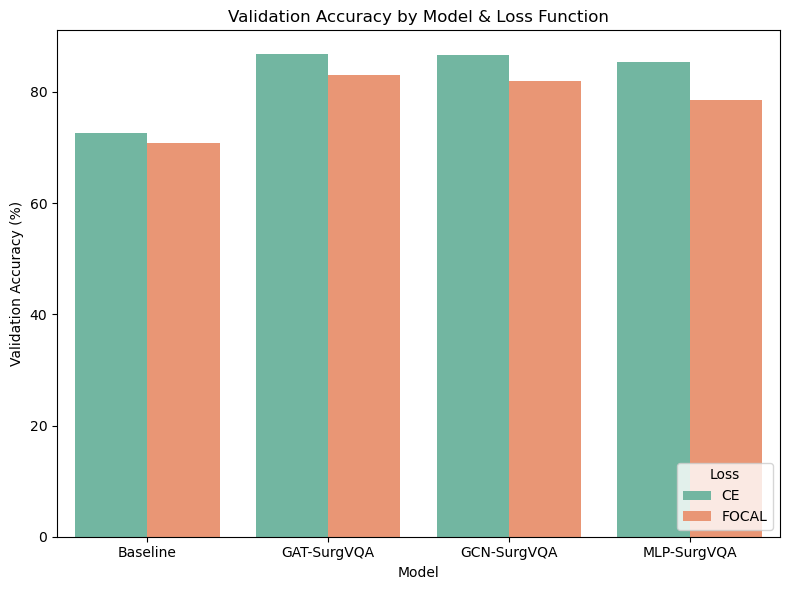

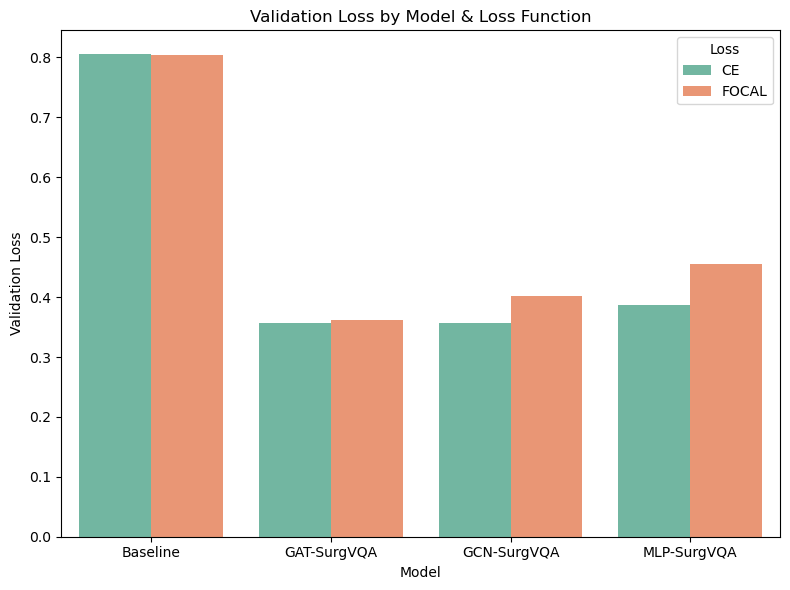

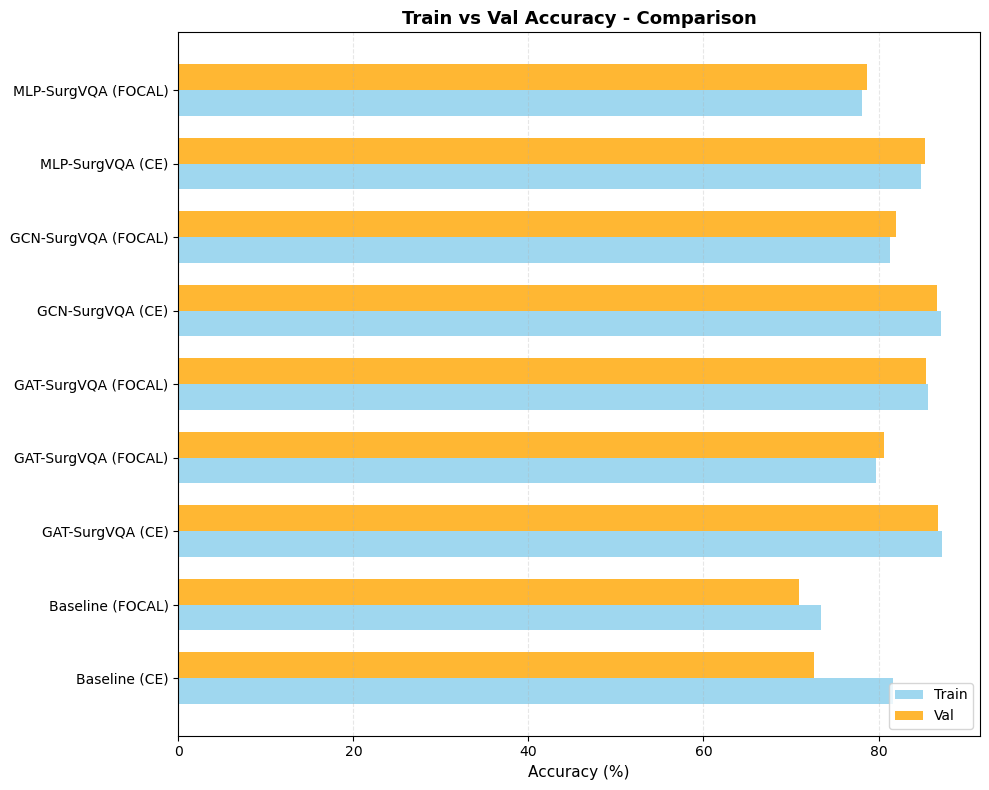

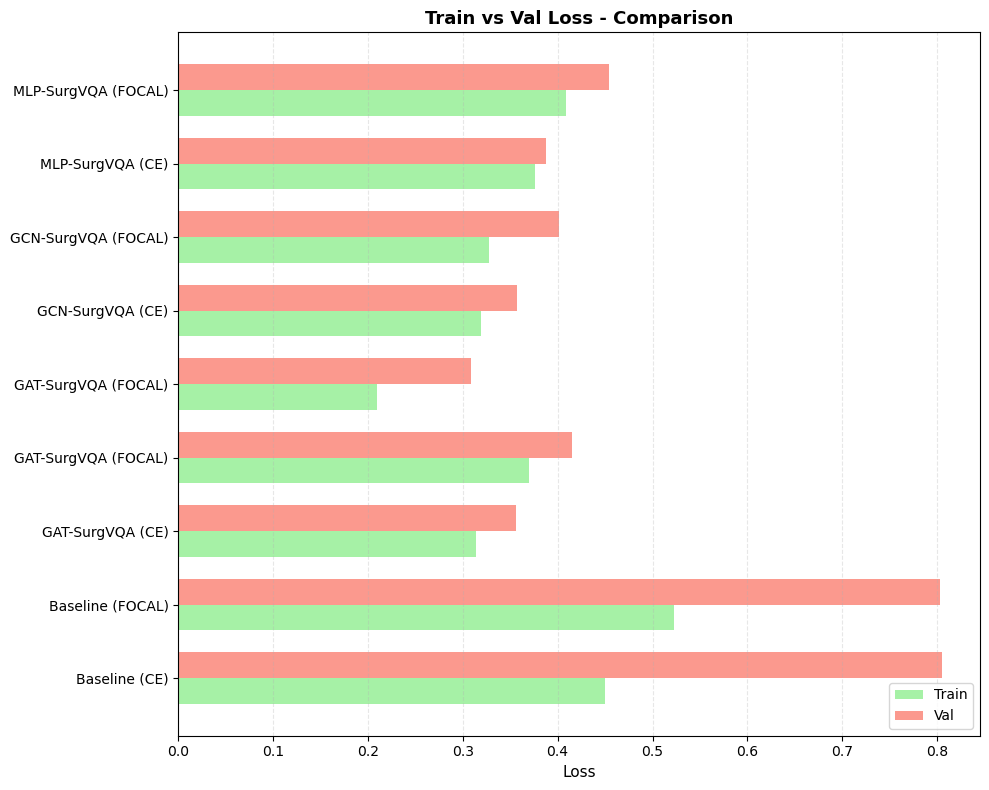

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đảm bảo kiểu dữ liệu số cho các cột cần vẽ
metrics = ['Train Accuracy', 'Val Accuracy', 'Train Loss', 'Val Loss']
for col in metrics:
    df_checkpoints[col] = pd.to_numeric(df_checkpoints[col], errors='coerce')

# 1. Biểu đồ Validation Accuracy
plt.figure(figsize=(8, 6))
plt.style.use('default')
sns.barplot(
    data=df_checkpoints,
    x='Model',
    y='Val Accuracy',
    hue='Loss Function',
    palette='Set2',
    errorbar=None
)
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy by Model & Loss Function')
plt.xticks(rotation=0, ha='center')
plt.gca().set_facecolor('white')
plt.legend(title='Loss', loc='lower right')
plt.tight_layout()
plt.show()

# 2. Biểu đồ Validation Loss
plt.figure(figsize=(8, 6))
plt.style.use('default')
sns.barplot(
    data=df_checkpoints,
    x='Model',
    y='Val Loss',
    hue='Loss Function',
    palette='Set2',
    errorbar=None
)
plt.ylabel('Validation Loss')
plt.title('Validation Loss by Model & Loss Function')
plt.xticks(rotation=0, ha='center')
plt.gca().set_facecolor('white')
plt.legend(title='Loss', loc='upper right')
plt.tight_layout()
plt.show()

# 3. So sánh Train/Val Accuracy - BIỂU ĐỒ THANH NGANG
plt.figure(figsize=(10, 8))
plt.style.use('default')
width = 0.35

# Tạo labels rõ ràng
labels = [f"{row['Model']} ({row['Loss Function']})" for _, row in df_checkpoints.iterrows()]
y_pos = range(len(df_checkpoints))

plt.barh([i - width/2 for i in y_pos], df_checkpoints['Train Accuracy'], 
         height=width, label='Train', color='skyblue', alpha=0.8)
plt.barh([i + width/2 for i in y_pos], df_checkpoints['Val Accuracy'], 
         height=width, label='Val', color='orange', alpha=0.8)

plt.yticks(y_pos, labels)
plt.xlabel('Accuracy (%)', fontsize=11)
plt.title('Train vs Val Accuracy - Comparison', fontsize=13, fontweight='bold')
plt.gca().set_facecolor('white')
plt.legend(loc='lower right')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 4. So sánh Train/Val Loss - BIỂU ĐỒ THANH NGANG
plt.figure(figsize=(10, 8))
plt.style.use('default')

plt.barh([i - width/2 for i in y_pos], df_checkpoints['Train Loss'], 
         height=width, label='Train', color='lightgreen', alpha=0.8)
plt.barh([i + width/2 for i in y_pos], df_checkpoints['Val Loss'], 
         height=width, label='Val', color='salmon', alpha=0.8)

plt.yticks(y_pos, labels)
plt.xlabel('Loss', fontsize=11)
plt.title('Train vs Val Loss - Comparison', fontsize=13, fontweight='bold')
plt.gca().set_facecolor('white')
plt.legend(loc='lower right')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Phân tích riêng theo loss Cross Entropy

In [1]:
import torch
import pandas as pd
from pathlib import Path

# Định nghĩa checkpoint folder
CHECKPOINTS_DIR = Path('checkpoints_full')

# Danh sách các model folders
model_folders = [
    'gat-ce',
    'gcn-ce',
    'nognn-ce',
    'baseline2-ce'
]

# Thu thập thông tin từ checkpoint epoch 10
checkpoint_data = []

for model_folder in model_folders:
    checkpoint_path = CHECKPOINTS_DIR / model_folder / 'checkpoint_epoch_10.pth'
    
    if checkpoint_path.exists():
        try:
            # Load checkpoint
            checkpoint = torch.load(checkpoint_path, map_location='cpu')
            
            # Phân tích tên model
            model_name_parts = model_folder.split('-')
            if 'baseline' in model_folder:
                model_type = 'Baseline'
                loss_type = model_name_parts[-1].upper()
            else:
                model_type = model_name_parts[0].upper()
                if len(model_name_parts) == 3:
                    loss_type = f"{model_name_parts[1].upper()}-{model_name_parts[2]}"
                else:
                    loss_type = model_name_parts[1].upper()
            
            # Tên hiển thị
            if model_type == 'NOGNN':
                display_name = 'MLP-SurgVQA'
            elif model_type == 'Baseline':
                display_name = 'Baseline'
            else:
                display_name = f'{model_type}-SurgVQA'
            
            # Thu thập metrics
            data = {
                'Model': display_name,
                'Architecture': model_type,
                'Loss Function': loss_type,
                'Epoch': checkpoint.get('epoch', 10),
                'Train Loss': checkpoint.get('train_loss', None),
                'Val Loss': checkpoint.get('val_loss', None),
                'Train Accuracy': checkpoint.get('train_acc', None),
                'Val Accuracy': checkpoint.get('val_acc', None),
                'Best Val Loss': checkpoint.get('best_val_loss', None),
                'Best Val Accuracy': checkpoint.get('best_val_acc', None),
                # 'Learning Rate': checkpoint.get('learning_rate', None),
                'Folder': model_folder
            }
            
            checkpoint_data.append(data)
            print(f"✅ Loaded: {model_folder}")
            
        except Exception as e:
            print(f"❌ Error loading {model_folder}: {e}")
    else:
        print(f"⚠️  Not found: {checkpoint_path}")

# Tạo DataFrame
df_checkpoints = pd.DataFrame(checkpoint_data)

# Sắp xếp theo Architecture và Loss Function
df_checkpoints = df_checkpoints.sort_values(['Architecture', 'Loss Function'])

print(f"\n📊 Tổng hợp {len(df_checkpoints)} checkpoints từ epoch 10")
df_checkpoints

✅ Loaded: gat-ce
✅ Loaded: gcn-ce
✅ Loaded: nognn-ce
✅ Loaded: baseline2-ce

📊 Tổng hợp 4 checkpoints từ epoch 10


,Model,Architecture,Loss Function,Epoch,Train Loss,Val Loss,Train Accuracy,Val Accuracy,Best Val Loss,Best Val Accuracy,Folder
3,Baseline,Baseline,CE,10,0.449842,0.805076,81.613977,72.586036,0.713721,71.826041,baseline2-ce
0,GAT-SurgVQA,GAT,CE,10,0.313925,0.356008,87.231929,86.752376,0.353870,86.841073,gat-ce
1,GCN-SurgVQA,GCN,CE,10,0.319217,0.356663,87.182035,86.681418,0.356663,86.681418,gcn-ce
2,MLP-SurgVQA,NOGNN,CE,10,0.376181,0.387492,84.856507,85.323885,0.387492,85.323885,nognn-ce


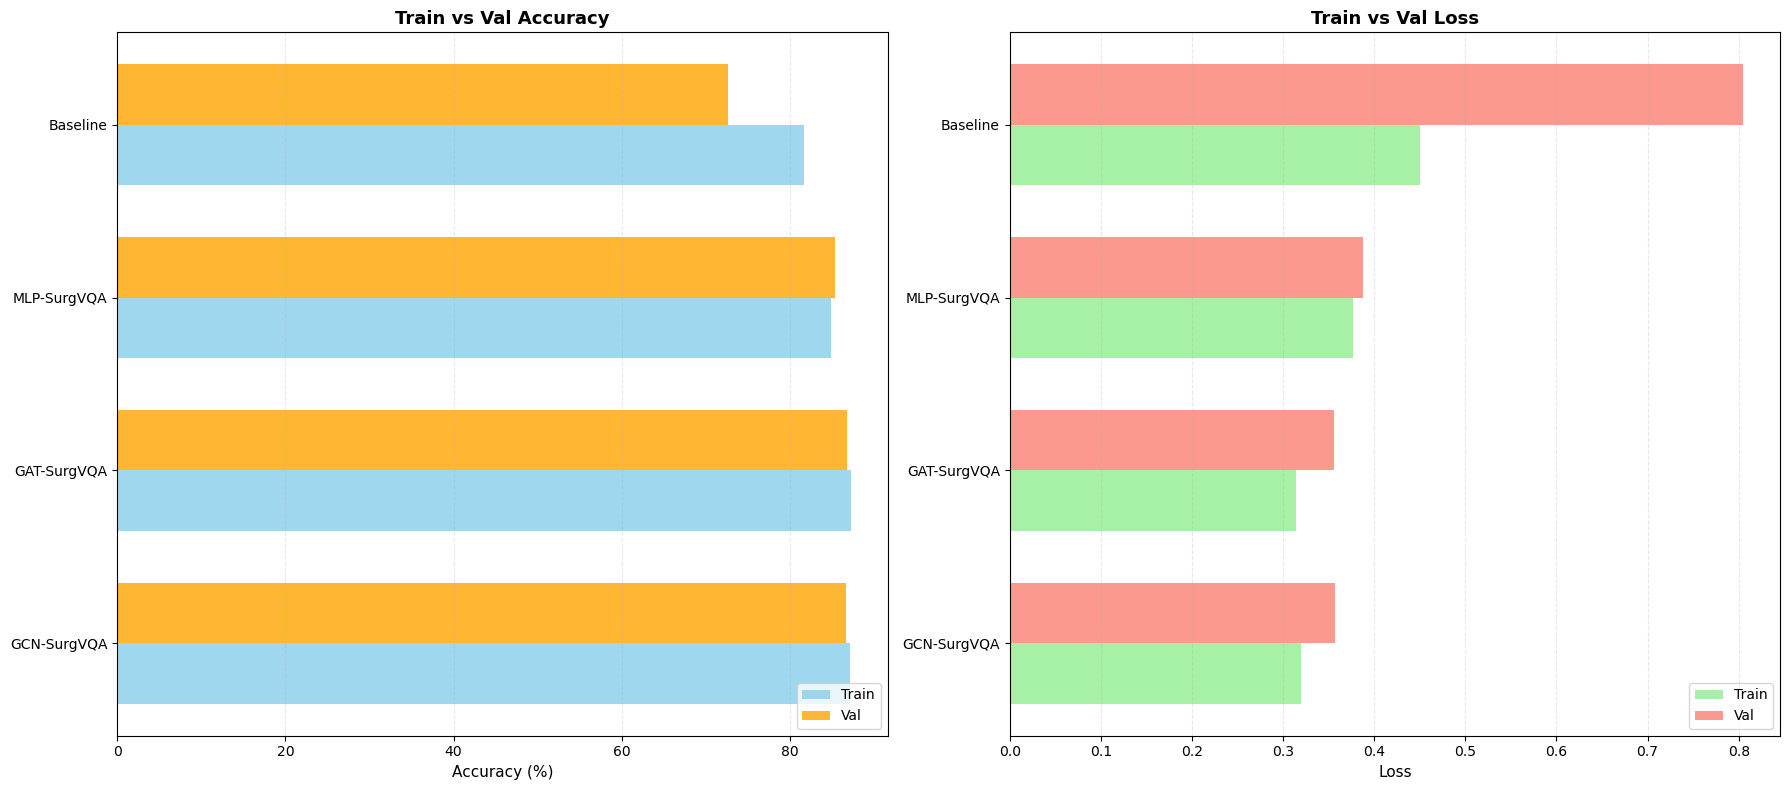

In [4]:
import matplotlib.pyplot as plt

# Đảm bảo kiểu dữ liệu số cho các cột cần vẽ
metrics = ['Train Accuracy', 'Val Accuracy', 'Train Loss', 'Val Loss']
for col in metrics:
    df_checkpoints[col] = pd.to_numeric(df_checkpoints[col], errors='coerce')

# Định nghĩa thứ tự model mong muốn
model_order = ['GCN-SurgVQA', 'GAT-SurgVQA', 'MLP-SurgVQA', 'Baseline']

# Lọc và sắp xếp lại DataFrame theo model_order
df_plot = df_checkpoints.copy()
df_plot['Model'] = df_plot['Model'].replace({'MLP-SurgVQA (CE)': 'MLP-SurgVQA', 'Baseline (CE)': 'Baseline'})
df_plot['Model'] = df_plot['Model'].str.replace(r'\s*\(CE\)', '', regex=True)
df_plot['Model'] = pd.Categorical(df_plot['Model'], categories=model_order, ordered=True)
df_plot = df_plot.sort_values('Model')

labels = [f"{row['Model']}" for _, row in df_plot.iterrows()]
y_pos = range(len(df_plot))
width = 0.35

# Vẽ 2 biểu đồ thành subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Biểu đồ 1: Train/Val Accuracy
axes[0].barh([i - width/2 for i in y_pos], df_plot['Train Accuracy'],
             height=width, label='Train', color='skyblue', alpha=0.8)
axes[0].barh([i + width/2 for i in y_pos], df_plot['Val Accuracy'],
             height=width, label='Val', color='orange', alpha=0.8)
axes[0].set_yticks(list(y_pos))
axes[0].set_yticklabels(labels)
axes[0].set_xlabel('Accuracy (%)', fontsize=11)
axes[0].set_title('Train vs Val Accuracy', fontsize=13, fontweight='bold')
axes[0].set_facecolor('white')
axes[0].legend(loc='lower right')
axes[0].grid(axis='x', alpha=0.3, linestyle='--')

# Biểu đồ 2: Train/Val Loss
axes[1].barh([i - width/2 for i in y_pos], df_plot['Train Loss'],
             height=width, label='Train', color='lightgreen', alpha=0.8)
axes[1].barh([i + width/2 for i in y_pos], df_plot['Val Loss'],
             height=width, label='Val', color='salmon', alpha=0.8)
axes[1].set_yticks(list(y_pos))
axes[1].set_yticklabels(labels)
axes[1].set_xlabel('Loss', fontsize=11)
axes[1].set_title('Train vs Val Loss', fontsize=13, fontweight='bold')
axes[1].set_facecolor('white')
axes[1].legend(loc='lower right')
axes[1].grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 3. Phân tích Kết quả Đánh giá trên Tập Test

Phân tích chi tiết kết quả đánh giá các mô hình trên tập test và test_full

## 3.1. Visual Oracle 

In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Định nghĩa đường dẫn
BASE_DIR = Path(".")
RESULTS_DIR = BASE_DIR / 'results'

# Đọc tất cả các file kết quả
results_data = []

for result_file in RESULTS_DIR.glob('*.json'):
    # Parse tên file để lấy thông tin
    filename = result_file.stem  # Ví dụ: test_gat-ce, test_full_gcn-focal
    parts = filename.split('_')
    
    if 'full' in parts:
        test_split = 'test_full'
        model_loss = '_'.join(parts[2:])  # gat-ce, gcn-focal, etc.
    else:
        test_split = 'test'
        model_loss = '_'.join(parts[1:])
    
    # Tách model và loss
    model_parts = model_loss.split('-')
    model_type = model_parts[0]  # gat, gcn, nognn
    
    # Xử lý loss function (có thể có dạng focal-1e-4, focal-5e-5)
    if len(model_parts) > 1:
        if 'focal' in model_parts[1]:
            if len(model_parts) > 2:
                loss_func = f"focal-{model_parts[2]}"  # focal-1e-4
            else:
                loss_func = "focal"
        else:
            loss_func = model_parts[1]  # ce
    else:
        loss_func = "unknown"
    
    # Đọc dữ liệu JSON
    with open(result_file, 'r') as f:
        data = json.load(f)
    
    # Trích xuất thông tin overall
    overall = data['overall']
    
    results_data.append({
        'File': filename,
        'Test Split': test_split,
        'Model': model_type.upper(),
        'Loss Function': loss_func.upper(),
        'Accuracy (%)': overall['accuracy'],
        'Precision (Macro)': overall['precision_macro'],
        'Recall (Macro)': overall['recall_macro'],
        'F1 (Macro)': overall['f1_macro'],
        'Precision (Weighted)': overall['precision_weighted'],
        'Recall (Weighted)': overall['recall_weighted'],
        'F1 (Weighted)': overall['f1_weighted'],
        'Correct': overall['correct'],
        'Total': overall['total']
    })

# Tạo DataFrame
df_results = pd.DataFrame(results_data)

# Sắp xếp theo Test Split, Model, Loss
df_results = df_results.sort_values(['Test Split', 'Model', 'Loss Function'])

print("=" * 100)
print("TỔNG HỢP KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST")
print("=" * 100)
print(f"\nTổng số file kết quả: {len(results_data)}")
print(f"Tập test: {df_results['Test Split'].unique()}")
print(f"Models: {df_results['Model'].unique()}")
print(f"Loss Functions: {df_results['Loss Function'].unique()}")

# Hiển thị bảng kết quả
display(df_results)

TỔNG HỢP KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST

Tổng số file kết quả: 18
Tập test: ['test' 'test_full']
Models: ['BASELINE2' 'GAT' 'GCN' 'NOGNN']
Loss Functions: ['CE' 'FOCAL' 'FOCAL-1E' 'FOCAL-5E']


,File,Test Split,Model,Loss Function,Accuracy (%),Precision (Macro),Recall (Macro),F1 (Macro),Precision (Weighted),Recall (Weighted),F1 (Weighted),Correct,Total
0,test_baseline2-ce,test,BASELINE2,CE,59.215667,0.480095,0.438892,0.445967,0.589449,0.592157,0.584949,23797,40187
1,test_baseline2-focal,test,BASELINE2,FOCAL,58.115809,0.485982,0.426789,0.431055,0.583207,0.581158,0.570633,23355,40187
11,test_gat-ce,test,GAT,CE,63.844029,0.536505,0.500763,0.505867,0.642827,0.638440,0.633904,25657,40187
12,test_gat-focal-1e-4,test,GAT,FOCAL-1E,61.024709,0.536543,0.474019,0.485799,0.612948,0.610247,0.600769,24524,40187
13,test_gat-focal-5e-5,test,GAT,FOCAL-5E,63.555379,0.528175,0.501228,0.505572,0.639556,0.635554,0.632323,25541,40187
14,test_gcn-ce,test,GCN,CE,64.194889,0.564638,0.511533,0.520348,0.647998,0.641949,0.636187,25798,40187
15,test_gcn-focal,test,GCN,FOCAL,62.408241,0.536281,0.499622,0.500067,0.629618,0.624082,0.618049,25080,40187
16,test_nognn-ce,test,NOGNN,CE,63.438425,0.554410,0.475677,0.485086,0.636050,0.634384,0.625198,25494,40187
17,test_nognn-focal,test,NOGNN,FOCAL,61.880708,0.532192,0.495897,0.493989,0.624505,0.618807,0.612569,24868,40187
2,test_full_baseline2-ce,test_full,BASELINE2,CE,69.140392,0.533626,0.502629,0.508079,0.689801,0.691404,0.686827,53375,77198


## 3.2. Without Visual Oracle

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Định nghĩa đường dẫn
BASE_DIR = Path(".")
RESULTS_PREDICTED_DIR = BASE_DIR / 'results_predicted'

# Đọc tất cả các file kết quả
results_data = []

for result_file in RESULTS_PREDICTED_DIR.glob('*.json'):
    # Parse tên file để lấy thông tin
    filename = result_file.stem  # Ví dụ: test_gat-ce, test_full_gcn-focal
    parts = filename.split('_')
    
    if 'full' in parts:
        test_split = 'test_full'
        model_loss = '_'.join(parts[2:])  # gat-ce, gcn-focal, etc.
    else:
        test_split = 'test'
        model_loss = '_'.join(parts[1:])
    
    # Tách model và loss
    model_parts = model_loss.split('-')
    model_type = model_parts[0]  # gat, gcn, nognn
    
    # Xử lý loss function (có thể có dạng focal-1e-4, focal-5e-5)
    if len(model_parts) > 1:
        if 'focal' in model_parts[1]:
            if len(model_parts) > 2:
                loss_func = f"focal-{model_parts[2]}"  # focal-1e-4
            else:
                loss_func = "focal"
        else:
            loss_func = model_parts[1]  # ce
    else:
        loss_func = "unknown"
    
    # Đọc dữ liệu JSON
    with open(result_file, 'r') as f:
        data = json.load(f)
    
    # Trích xuất thông tin overall
    overall = data['overall']
    
    results_data.append({
        'File': filename,
        'Test Split': test_split,
        'Model': model_type.upper(),
        'Loss Function': loss_func.upper(),
        'Accuracy (%)': overall['accuracy'],
        'Precision (Macro)': overall['precision_macro'],
        'Recall (Macro)': overall['recall_macro'],
        'F1 (Macro)': overall['f1_macro'],
        'Precision (Weighted)': overall['precision_weighted'],
        'Recall (Weighted)': overall['recall_weighted'],
        'F1 (Weighted)': overall['f1_weighted'],
        'Correct': overall['correct'],
        'Total': overall['total']
    })

# Tạo DataFrame
df_results = pd.DataFrame(results_data)

# Sắp xếp theo Test Split, Model, Loss
df_results = df_results.sort_values(['Test Split', 'Model', 'Loss Function'])

print("=" * 100)
print("TỔNG HỢP KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST")
print("=" * 100)
print(f"\nTổng số file kết quả: {len(results_data)}")
print(f"Tập test: {df_results['Test Split'].unique()}")
print(f"Models: {df_results['Model'].unique()}")
print(f"Loss Functions: {df_results['Loss Function'].unique()}")

# Hiển thị bảng kết quả
display(df_results)

TỔNG HỢP KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST

Tổng số file kết quả: 14
Tập test: ['test' 'test_full']
Models: ['GAT' 'GCN' 'NOGNN']
Loss Functions: ['CE' 'FOCAL-1E' 'FOCAL-5E' 'FOCAL']


,File,Test Split,Model,Loss Function,Accuracy (%),Precision (Macro),Recall (Macro),F1 (Macro),Precision (Weighted),Recall (Weighted),F1 (Weighted),Correct,Total
7,test_gat-ce,test,GAT,CE,61.584592,0.542053,0.499906,0.507088,0.615666,0.615846,0.609077,24749,40187
8,test_gat-focal-1e-4,test,GAT,FOCAL-1E,59.377411,0.533949,0.474819,0.480869,0.600130,0.593774,0.584618,23862,40187
9,test_gat-focal-5e-5,test,GAT,FOCAL-5E,61.457685,0.538333,0.504121,0.509724,0.613317,0.614577,0.609327,24698,40187
10,test_gcn-ce,test,GCN,CE,62.129544,0.535135,0.496398,0.501087,0.624672,0.621295,0.613123,24968,40187
11,test_gcn-focal,test,GCN,FOCAL,60.698733,0.557263,0.510845,0.515836,0.610120,0.606987,0.598678,24393,40187
12,test_nognn-ce,test,NOGNN,CE,61.711499,0.548811,0.484693,0.495011,0.617264,0.617115,0.606710,24800,40187
13,test_nognn-focal,test,NOGNN,FOCAL,60.870431,0.515157,0.497459,0.491147,0.609099,0.608704,0.602259,24462,40187
0,test_full_gat-ce,test_full,GAT,CE,69.183139,0.550811,0.522131,0.519836,0.691788,0.691831,0.686283,53408,77198
1,test_full_gat-focal-1e-4,test_full,GAT,FOCAL-1E,67.733620,0.573871,0.529717,0.529948,0.683698,0.677336,0.670794,52289,77198
2,test_full_gat-focal-5e-5,test_full,GAT,FOCAL-5E,69.535480,0.561971,0.543139,0.540467,0.695258,0.695355,0.690902,53680,77198


### 3.1. So sánh Accuracy theo Model và Loss Function

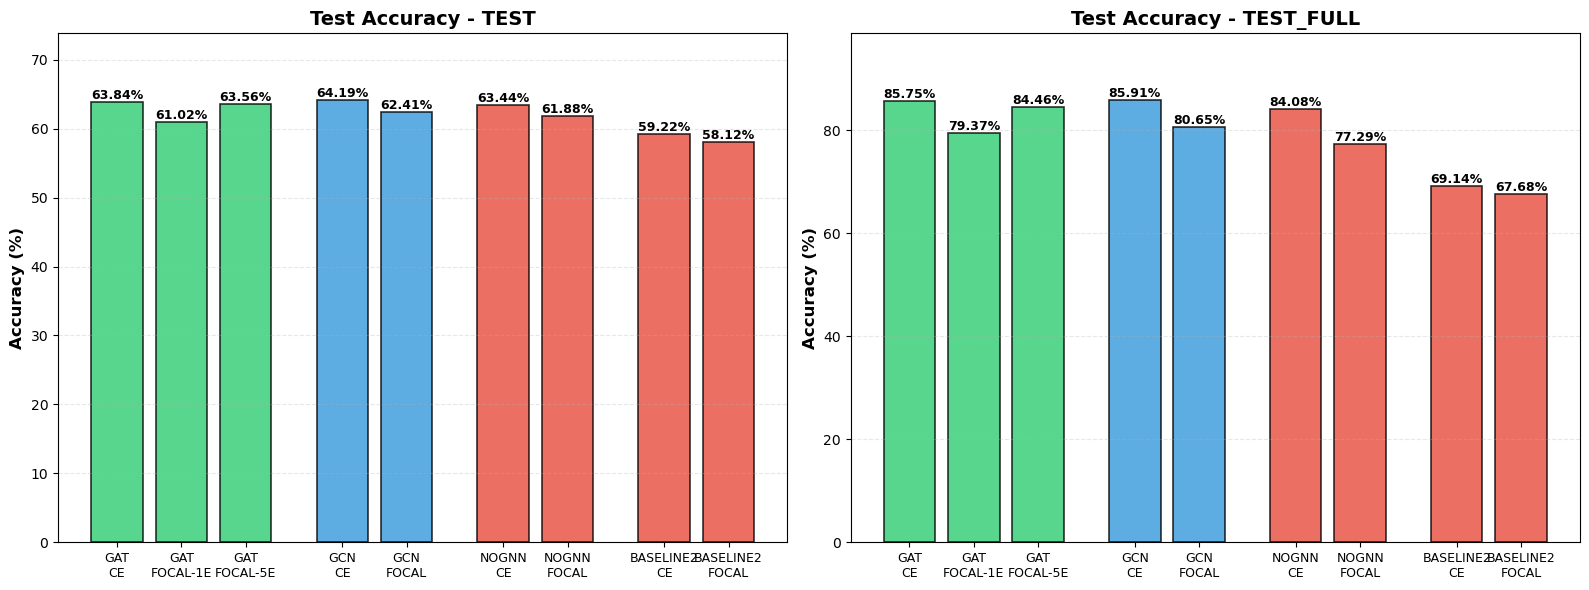


📊 Phân tích:

TEST:
  ✅ Best: GCN + CE = 64.19%
  ❌ Worst: BASELINE2 + FOCAL = 58.12%
  📈 Improvement: 6.08%

TEST_FULL:
  ✅ Best: GCN + CE = 85.91%
  ❌ Worst: BASELINE2 + FOCAL = 67.68%
  📈 Improvement: 18.22%


In [5]:
# Biểu đồ so sánh Accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Test split
for idx, split in enumerate(['test', 'test_full']):
    df_split = df_results[df_results['Test Split'] == split]
    
    ax = axes[idx]
    
    # Tạo biểu đồ nhóm
    x_labels = []
    x_pos = []
    colors = []
    accuracies = []
    
    model_order = ['GAT', 'GCN', 'NOGNN', 'BASELINE2']
    loss_order = ['CE', 'FOCAL', 'FOCAL-1E-4', 'FOCAL-5E-5']
    
    pos = 0
    for model in model_order:
        df_model = df_split[df_split['Model'] == model]
        if len(df_model) > 0:
            for _, row in df_model.iterrows():
                x_labels.append(f"{model}\n{row['Loss Function']}")
                x_pos.append(pos)
                accuracies.append(row['Accuracy (%)'])
                
                # Màu sắc theo model
                if model == 'GAT':
                    colors.append('#2ecc71')
                elif model == 'GCN':
                    colors.append('#3498db')
                else:  # NOGNN
                    colors.append('#e74c3c')
                
                pos += 1
            pos += 0.5  # Khoảng cách giữa các model
    
    bars = ax.bar(x_pos, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
    
    # Thêm giá trị trên mỗi cột
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.2f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels, fontsize=9)
    ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    ax.set_title(f'Test Accuracy - {split.upper()}', fontsize=14, fontweight='bold')
    ax.set_ylim(0, max(accuracies) * 1.15)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_facecolor('white')

plt.tight_layout()
plt.show()

print("\n📊 Phân tích:")
print("=" * 80)
for split in ['test', 'test_full']:
    df_split = df_results[df_results['Test Split'] == split]
    best_row = df_split.loc[df_split['Accuracy (%)'].idxmax()]
    worst_row = df_split.loc[df_split['Accuracy (%)'].idxmin()]
    
    print(f"\n{split.upper()}:")
    print(f"  ✅ Best: {best_row['Model']} + {best_row['Loss Function']} = {best_row['Accuracy (%)']:.2f}%")
    print(f"  ❌ Worst: {worst_row['Model']} + {worst_row['Loss Function']} = {worst_row['Accuracy (%)']:.2f}%")
    print(f"  📈 Improvement: {best_row['Accuracy (%)'] - worst_row['Accuracy (%)']:.2f}%")

### 3.2. So sánh F1-Score (Macro & Weighted)

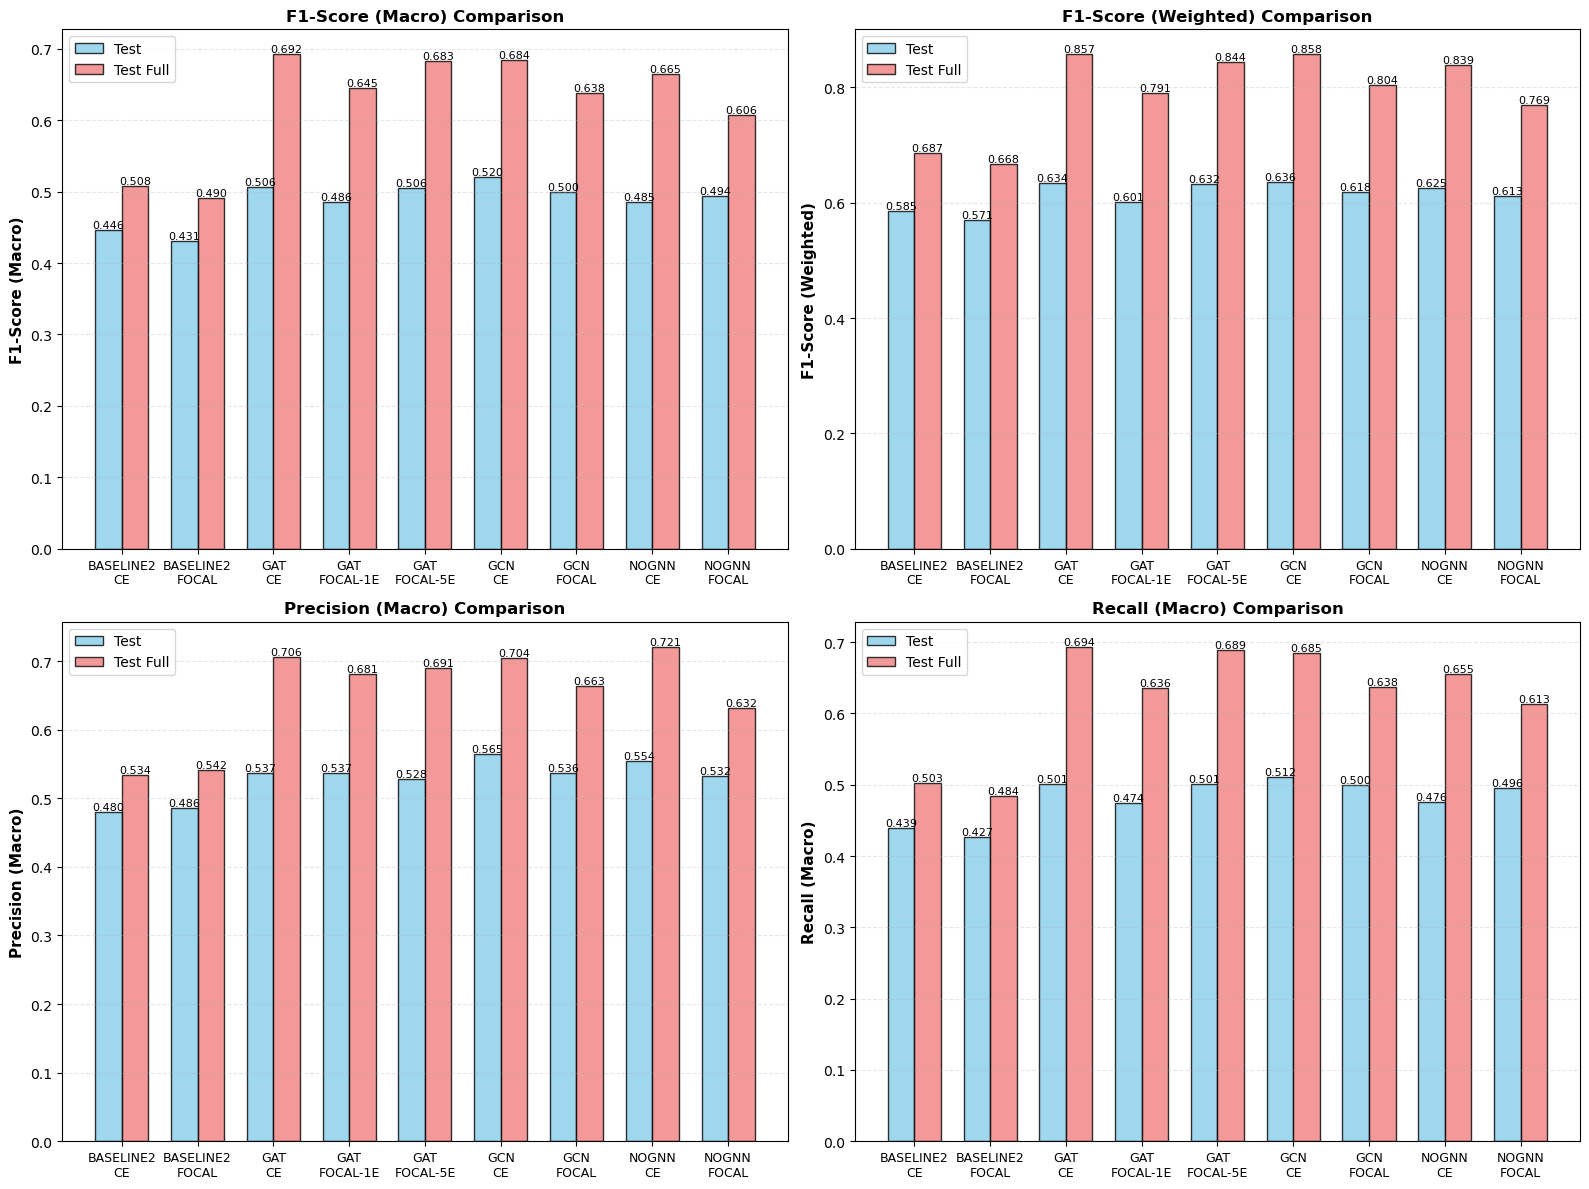

In [6]:
# So sánh F1-Score
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_to_plot = [
    ('F1 (Macro)', 'F1-Score (Macro)'),
    ('F1 (Weighted)', 'F1-Score (Weighted)'),
    ('Precision (Macro)', 'Precision (Macro)'),
    ('Recall (Macro)', 'Recall (Macro)')
]

for idx, (metric_col, metric_title) in enumerate(metrics_to_plot):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Tạo dữ liệu cho biểu đồ nhóm
    test_data = df_results[df_results['Test Split'] == 'test'][metric_col].values
    test_full_data = df_results[df_results['Test Split'] == 'test_full'][metric_col].values
    
    # Labels
    labels = [f"{row['Model']}\n{row['Loss Function']}" 
              for _, row in df_results[df_results['Test Split'] == 'test'].iterrows()]
    
    x = range(len(labels))
    width = 0.35
    
    bars1 = ax.bar([i - width/2 for i in x], test_data, width, 
                    label='Test', color='skyblue', alpha=0.8, edgecolor='black')
    bars2 = ax.bar([i + width/2 for i in x], test_full_data, width,
                    label='Test Full', color='lightcoral', alpha=0.8, edgecolor='black')
    
    # Thêm giá trị
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)
    
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_ylabel(metric_title, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric_title} Comparison', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_facecolor('white')

plt.tight_layout()
plt.show()

### 3.3. Phân tích chi tiết theo Query Type và Analysis Type

### Visual Oracle

In [15]:
# Đọc chi tiết theo query type và analysis type từ file kết quả tốt nhất
# best_model_file = df_results.loc[df_results['Accuracy (%)'].idxmax(), 'File']
# best_model_path = RESULTS_DIR / f"{best_model_file}.json"
best_model_file = "test_gcn-ce"
best_model_path = RESULTS_DIR / "test_gcn-ce.json"

print(f"📊 Phân tích chi tiết từ mô hình tốt nhất: {best_model_file}")
print("=" * 100)

with open(best_model_path, 'r') as f:
    best_data = json.load(f)

# 1. Phân tích theo Query Type
print("\n1️⃣ KẾT QUẢ THEO QUERY TYPE:")
print("-" * 100)

query_type_data = []
for query_type, metrics in best_data['by_query_type'].items():
    query_type_data.append({
        'Query Type': query_type,
        'Accuracy (%)': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1_score'],
        'Correct': metrics['correct'],
        'Total': metrics['total']
    })

df_query_type = pd.DataFrame(query_type_data)
df_query_type = df_query_type.sort_values('Accuracy (%)', ascending=False)
display(df_query_type)

# 2. Phân tích theo Analysis Type
print("\n2️⃣ KẾT QUẢ THEO ANALYSIS TYPE:")
print("-" * 100)

ana_type_data = []
for ana_type, metrics in best_data['by_ana_type'].items():
    ana_type_data.append({
        'Analysis Type': ana_type,
        'Accuracy (%)': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1_score'],
        'Correct': metrics['correct'],
        'Total': metrics['total']
    })

df_ana_type = pd.DataFrame(ana_type_data)
df_ana_type = df_ana_type.sort_values('Accuracy (%)', ascending=False)
display(df_ana_type)

📊 Phân tích chi tiết từ mô hình tốt nhất: test_gcn-ce

1️⃣ KẾT QUẢ THEO QUERY TYPE:
----------------------------------------------------------------------------------------------------


,Query Type,Accuracy (%),Precision,Recall,F1-Score,Correct,Total
5,query_type,79.858272,0.804353,0.794905,0.795882,2930,3669
1,exist,76.743632,0.780888,0.765697,0.763789,3224,4201
2,general,70.931182,0.640758,0.594729,0.599981,6947,9794
0,count,63.885002,0.310673,0.229048,0.240323,5022,7861
3,query_color,53.571429,0.538337,0.513544,0.516596,3930,7336
4,query_component,51.119301,0.497191,0.416949,0.420699,3745,7326



2️⃣ KẾT QUẢ THEO ANALYSIS TYPE:
----------------------------------------------------------------------------------------------------


,Analysis Type,Accuracy (%),Precision,Recall,F1-Score,Correct,Total
3,zero_hop.json,83.279045,0.556856,0.585946,0.546744,767,921
0,general,70.931182,0.640758,0.594729,0.599981,6947,9794
1,one_hop.json,67.631132,0.540735,0.473765,0.484831,12739,18836
2,single_and.json,50.253855,0.438382,0.360313,0.356231,5345,10636


### Without Visual Oracle

In [16]:
# Đọc chi tiết theo query type và analysis type từ file kết quả tốt nhất
# best_model_file = df_results.loc[df_results['Accuracy (%)'].idxmax(), 'File']
# best_model_path = RESULTS_DIR / f"{best_model_file}.json"
best_model_file = "test_gcn-ce"
best_model_path = RESULTS_PREDICTED_DIR / "test_gcn-ce.json"

print(f"📊 Phân tích chi tiết từ mô hình tốt nhất: {best_model_file}")
print("=" * 100)

with open(best_model_path, 'r') as f:
    best_data = json.load(f)

# 1. Phân tích theo Query Type
print("\n1️⃣ KẾT QUẢ THEO QUERY TYPE:")
print("-" * 100)

query_type_data = []
for query_type, metrics in best_data['by_query_type'].items():
    query_type_data.append({
        'Query Type': query_type,
        'Accuracy (%)': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1_score'],
        'Correct': metrics['correct'],
        'Total': metrics['total']
    })

df_query_type = pd.DataFrame(query_type_data)
df_query_type = df_query_type.sort_values('Accuracy (%)', ascending=False)
display(df_query_type)

# 2. Phân tích theo Analysis Type
print("\n2️⃣ KẾT QUẢ THEO ANALYSIS TYPE:")
print("-" * 100)

ana_type_data = []
for ana_type, metrics in best_data['by_ana_type'].items():
    ana_type_data.append({
        'Analysis Type': ana_type,
        'Accuracy (%)': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1_score'],
        'Correct': metrics['correct'],
        'Total': metrics['total']
    })

df_ana_type = pd.DataFrame(ana_type_data)
df_ana_type = df_ana_type.sort_values('Accuracy (%)', ascending=False)
display(df_ana_type)

📊 Phân tích chi tiết từ mô hình tốt nhất: test_gcn-ce

1️⃣ KẾT QUẢ THEO QUERY TYPE:
----------------------------------------------------------------------------------------------------


,Query Type,Accuracy (%),Precision,Recall,F1-Score,Correct,Total
5,query_type,79.095121,0.797044,0.787100,0.787985,2902,3669
1,exist,71.744823,0.743180,0.714857,0.708146,3014,4201
2,general,62.916071,0.563336,0.542573,0.540249,6162,9794
0,count,61.060934,0.271596,0.193955,0.199097,4800,7861
3,query_color,55.902399,0.560096,0.562737,0.554800,4101,7336
4,query_component,54.449904,0.454115,0.413159,0.421884,3989,7326



2️⃣ KẾT QUẢ THEO ANALYSIS TYPE:
----------------------------------------------------------------------------------------------------


,Analysis Type,Accuracy (%),Precision,Recall,F1-Score,Correct,Total
3,zero_hop.json,81.867535,0.666009,0.647498,0.634492,754,921
1,one_hop.json,66.314504,0.532393,0.487517,0.496788,12491,18836
0,general,62.916071,0.563336,0.542573,0.540249,6162,9794
2,single_and.json,52.284693,0.438026,0.398782,0.396109,5561,10636


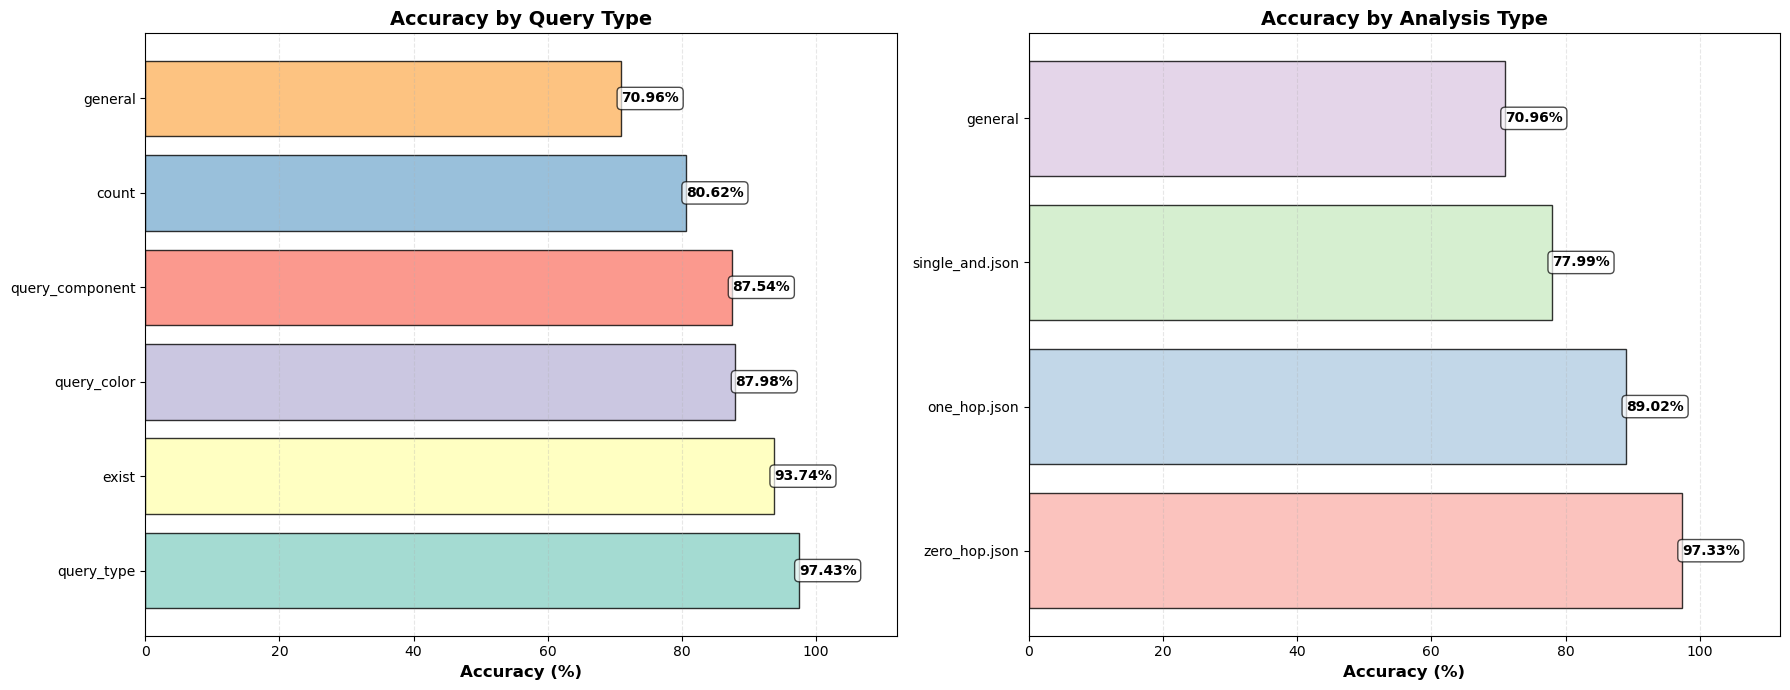


📈 SUMMARY:
🏆 Best Query Type: query_type (97.43%)
⚠️  Worst Query Type: general (70.96%)

🏆 Best Analysis Type: zero_hop.json (97.33%)
⚠️  Worst Analysis Type: general (70.96%)


In [8]:
# Biểu đồ so sánh Query Type và Analysis Type
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Query Type - Biểu đồ thanh ngang
ax1 = axes[0]
query_types = df_query_type['Query Type'].values
query_accuracies = df_query_type['Accuracy (%)'].values
colors_query = plt.cm.Set3(range(len(query_types)))

bars1 = ax1.barh(query_types, query_accuracies, color=colors_query, alpha=0.8, edgecolor='black')

# Thêm giá trị
for bar, acc in zip(bars1, query_accuracies):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2.,
             f'{acc:.2f}%',
             ha='left', va='center', fontsize=10, fontweight='bold', 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

ax1.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Accuracy by Query Type', fontsize=14, fontweight='bold')
ax1.set_xlim(0, max(query_accuracies) * 1.15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_facecolor('white')

# 2. Analysis Type - Biểu đồ thanh ngang
ax2 = axes[1]
ana_types = df_ana_type['Analysis Type'].values
ana_accuracies = df_ana_type['Accuracy (%)'].values
colors_ana = plt.cm.Pastel1(range(len(ana_types)))

bars2 = ax2.barh(ana_types, ana_accuracies, color=colors_ana, alpha=0.8, edgecolor='black')

# Thêm giá trị
for bar, acc in zip(bars2, ana_accuracies):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
             f'{acc:.2f}%',
             ha='left', va='center', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

ax2.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('Accuracy by Analysis Type', fontsize=14, fontweight='bold')
ax2.set_xlim(0, max(ana_accuracies) * 1.15)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.set_facecolor('white')

plt.tight_layout()
plt.show()

# Tóm tắt
print("\n📈 SUMMARY:")
print("=" * 100)
print(f"🏆 Best Query Type: {df_query_type.iloc[0]['Query Type']} ({df_query_type.iloc[0]['Accuracy (%)']:.2f}%)")
print(f"⚠️  Worst Query Type: {df_query_type.iloc[-1]['Query Type']} ({df_query_type.iloc[-1]['Accuracy (%)']:.2f}%)")
print(f"\n🏆 Best Analysis Type: {df_ana_type.iloc[0]['Analysis Type']} ({df_ana_type.iloc[0]['Accuracy (%)']:.2f}%)")
print(f"⚠️  Worst Analysis Type: {df_ana_type.iloc[-1]['Analysis Type']} ({df_ana_type.iloc[-1]['Accuracy (%)']:.2f}%)")